In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#load data
df = pd.read_csv("../data/processed/cleaned_news.csv")

#### Split data into training and testing sets

In [3]:
X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"training data size: {len(X_train)}")
print(f"testing data size: {len(X_test)}")

training data size: 30925
testing data size: 7732


#### Convert test to numerical data

In [4]:
vectorizer = TfidfVectorizer(stop_words = "english", max_features = 5000)

#transform text data to TF-IDF feature vectors
X_train_tfidt = vectorizer.fit_transform(X_train)
X_test_tfidt = vectorizer.transform(X_test)

print("TF-IDF feature shape:", X_train_tfidt.shape)

TF-IDF feature shape: (30925, 5000)


#### Train a Logistic Regression Model

In [5]:
#Train a logistic model
model = LogisticRegression(class_weight='balanced', C = 0.5, random_state=42)

model.fit(X_train_tfidt, y_train)

LogisticRegression(C=0.5, class_weight='balanced', random_state=42)

#### Evaluate the model performance

Model Accuracy: 0.98

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3491
           1       0.98      0.99      0.98      4239

    accuracy                           0.98      7730
   macro avg       0.98      0.98      0.98      7730
weighted avg       0.98      0.98      0.98      7730



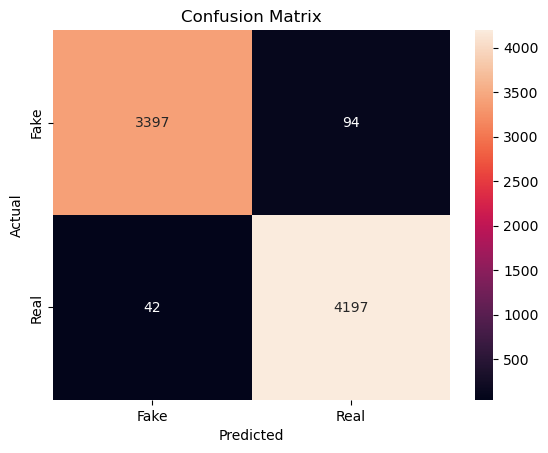

In [13]:
#make prediction
y_pred = model.predict(X_test_tfidt)

#calculate accurracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}\n")

#display classification report
print(classification_report(y_test, y_pred))

#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d", xticklabels = ["Fake", "Real"], yticklabels = ["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Save trained model and vectorizer

In [14]:
joblib.dump(model, "../model/model.pkl")
joblib.dump(vectorizer, "../model/vectorizer.pkl")

print("Model training completed")

Model training completed
